In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist  # To import MNIST dataset
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [3]:
np.random.seed(0)

In [4]:
# Loading 60,000 train images into train dataset and 10,000 into test dataset,
# each image is 28 by 28 pixels
# It can be seen by print(X_train.shape) and print(X_test.shape)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape[0])

(10000, 28, 28)
(60000, 28, 28)
60000


In [6]:
# Verify whether our complex dataset is imported correctly.
# assert() take in a single argument, which is usually a condition which is
# either true or false. If the condition is not met, the code will stop running
# and will show an error to the user. It helps debugging the code when necessary
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the image are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the image are not 28x28"

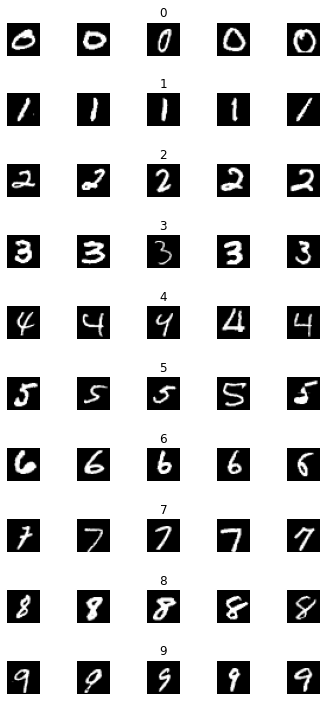

In [13]:
# An empty list that will be used to record the amount of images in each of our
# 10 categories
num_of_samples = []

# A grid arrangement to help us visualize our data, including 10 rows (0-9) and
# each row will have 5 columns of images, obtained from MNIST
cols = 5
num_classes = 10

# plt.subplots() allows multiple plot at the same figure, and returns a tuple of
# 2 values, an instance of our figure as well as the plot axes, which we will
# use to show and plot our image
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()  # Minimizes overlapping of plots and axes

# To count up how many instances of each class are in our dataset, by looping
# through every single column, and for each column iteration we will iterate
# through every row, or in this case every class --> following nested for loop
# ### Watch the video #122 for explanation of the loop
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))  # cmap=plt.get_cmap("gray") --> Grayscale colour map
        axs[j][i].axis("off")  # To turn off axis titles for each plot
        
        # Set a title for each class at the middle
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

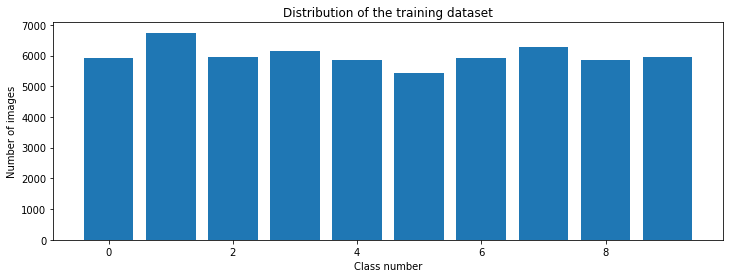

In [16]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

**Preparing our data to be used to train our neural network to recognize it:**

In [17]:
# One hot encoding our data labels
y_train = to_categorical(y_train, 10)  # 10 = total number of classes
y_test = to_categorical(y_test, 10)

In [18]:
# Normalizing our data
# Each image contains pixel intensities from 0 to 255. We devide by 255, because
# we want to normalize our data to be in a range between 0 and 1 (0->0, 255->1)
# Normalization is important as it scales down our features to a uniform range,
# and decreases variance among our data
# Due to the nature of the mathematical operations used inside the neural
# network, we need to ensure that our data has low variance. This helps the
# neural network better deal with the inputted data, and to learn more quickly
# and accurately
X_train = X_train/255
X_test = X_test/255

In [20]:
# Flatten our images:
# To conduct matrix multiplication, we must make our images, one dimensional.
# Therefore, instead of 28x28 matrix, it should be flattened to single row of
# 784 pixels
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Now that our data is properly formatted, we can finally move on towards creating our neural network and using it to classify the MNIST dataset images